In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from allison.clustering import Kmeans

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


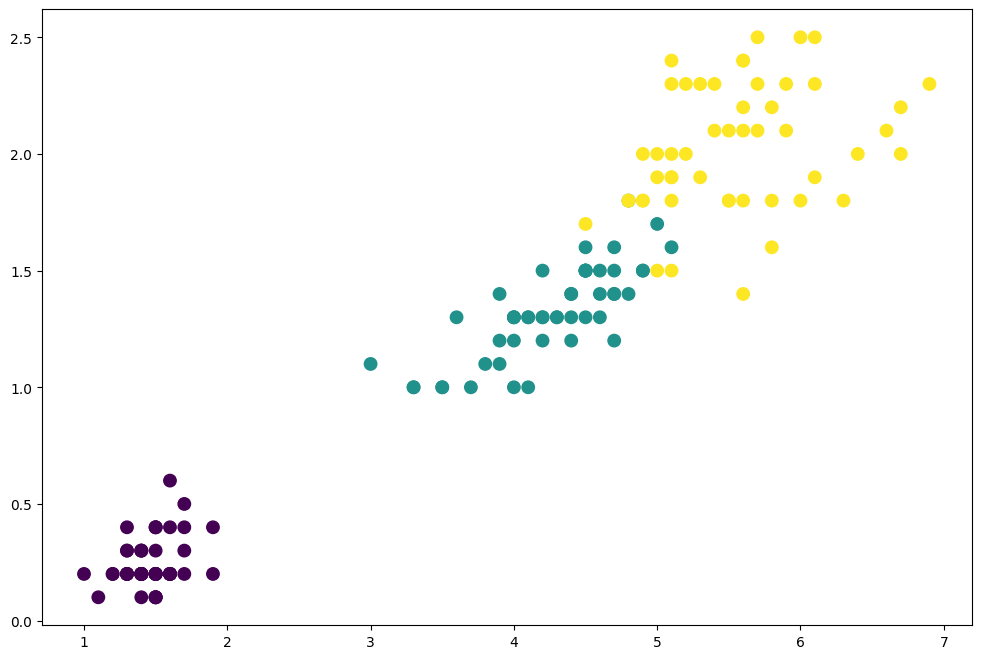

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [6]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [7]:
model= Kmeans(n_centroids=3)
model.train(X,history_train=True)

Iter: 1 	 ==================================================> 	 moviment: 1.145
Iter: 2 	 ==================================================> 	 moviment: 0.671
Iter: 3 	 ==================================================> 	 moviment: 0.513
Iter: 4 	 ==================================================> 	 moviment: 0.244
Iter: 5 	 ==================================================> 	 moviment: 0.087
Iter: 6 	 ==================================================> 	 moviment: 0.044
Iter: 7 	 ==================================================> 	 moviment: 0.029
Iter: 8 	 ==================================================> 	 moviment: 0.014
Iter: 9 	 ==================================================> 	 moviment: 0.015
Iter: 10 	 ==================================================> 	 moviment: 0.000


In [8]:
model


        model: Kmeans 

        n_centroids: 3 

        

In [9]:
pred_labels = model.predict(X)

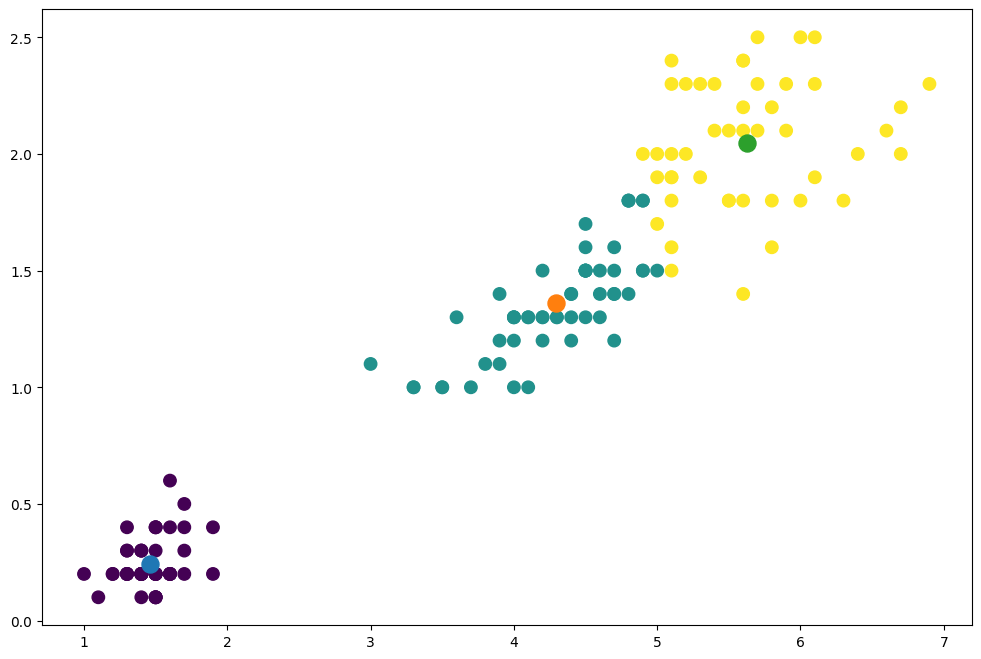

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [11]:
history=model.history_train
history

{0: array([[4.7, 1.4, 4.7, 1.4],
        [5.1, 2.3, 5.1, 2.3],
        [6. , 2.5, 6. , 2.5]]),
 1: array([[3.01666667, 0.85      , 3.01666667, 0.85      ],
        [5.25      , 2.035     , 5.25      , 2.035     ],
        [6.04545455, 2.15      , 6.04545455, 2.15      ]]),
 2: array([[2.1875    , 0.52638889, 2.1875    , 0.52638889],
        [4.91694915, 1.7220339 , 4.91694915, 1.7220339 ],
        [6.11578947, 2.12105263, 6.11578947, 2.12105263]]),
 3: array([[1.63272727, 0.31454545, 1.63272727, 0.31454545],
        [4.62173913, 1.54927536, 4.62173913, 1.54927536],
        [5.96538462, 2.13846154, 5.96538462, 2.13846154]]),
 4: array([[1.49411765, 0.26078431, 1.49411765, 0.26078431],
        [4.4453125 , 1.446875  , 4.4453125 , 1.446875  ],
        [5.80285714, 2.11142857, 5.80285714, 2.11142857]]),
 5: array([[1.464     , 0.244     , 1.464     , 0.244     ],
        [4.37704918, 1.40819672, 4.37704918, 1.40819672],
        [5.73333333, 2.09487179, 5.73333333, 2.09487179]]),
 6: array(

# Kmeans Animation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.centroids = history[i]
    pred_labels = model.predict(X)
    ax.scatter(data['PetalLengthCm'], data['PetalWidthCm'], s=80, c=pred_labels)

    for centroid in model.centroids:
        ax.scatter(centroid[0], centroid[1], s=150)


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history), repeat=False)
# Display the animation
HTML(ani.to_jshtml())

In [13]:
model.get_distances(X)

array([[0.10983624, 4.40703391, 6.52292453],
       [0.10983624, 4.40703391, 6.52292453],
       [0.2401333 , 4.53861046, 6.65274223],
       [0.080399  , 4.27608592, 6.39359911],
       [0.10983624, 4.40703391, 6.52292453],
       [0.40007999, 3.90940269, 6.02154293],
       [0.12026637, 4.35640266, 6.46756631],
       [0.080399  , 4.27608592, 6.39359911],
       [0.10983624, 4.40703391, 6.52292453],
       [0.20991427, 4.33227591, 6.45269247],
       [0.080399  , 4.27608592, 6.39359911],
       [0.20214846, 4.14582607, 6.26479647],
       [0.22285421, 4.46157501, 6.5808567 ],
       [0.55359191, 4.85353095, 6.96842731],
       [0.37850231, 4.67076246, 6.78302396],
       [0.22641555, 4.17582368, 6.28329919],
       [0.32009998, 4.44427469, 6.54680978],
       [0.12026637, 4.35640266, 6.46756631],
       [0.34302187, 3.96069856, 6.07767304],
       [0.09414882, 4.22388531, 6.33711127],
       [0.33950552, 4.0163213 , 6.13654953],
       [0.22641555, 4.17582368, 6.28329919],
       [0.

In [14]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.train(X, history_train=False)
    inertias.append(model.get_inertia(X))

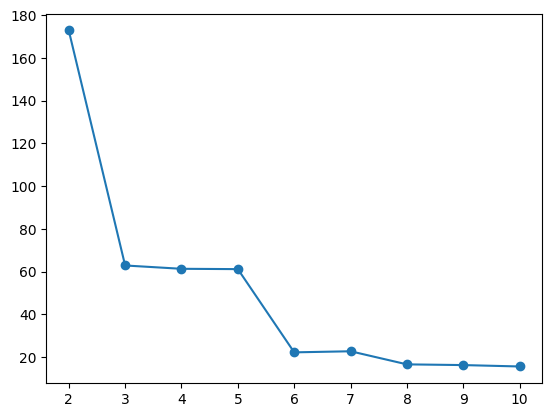

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')